In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

In [4]:
ticker = "IVV"
start_date = "2017-01-01"
end_date = "2024-01-01"
interval = "2M"
amount = 1000

In [ ]:
data = yf.download(tickers=ticker, start=start_date, end=end_date)

data.dropna()

resampled_data = data.resample(interval).first()
resampled_data

In [ ]:
total_investment = 0
total_shares = 0

dca_log = []


for date, row in resampled_data.iterrows():
    price = row["Adj Close"]

    total_shares += amount/price
    total_investment += amount

    dca_log.append({
        "Date": date,
        "Price": price,
        "Total Shares": total_shares,
        "Total Investment": total_investment,
        "Portfolio Value": total_shares * price
    })

df = pd.DataFrame(dca_log)
df

In [10]:
final_portfolio_value = total_shares * data.iloc[-1]["Adj Close"]
total_profit = final_portfolio_value - total_investment

print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Profit: {total_profit}")

Final Portfolio Value: 68021.1973974958
Profit: 25021.197397495795


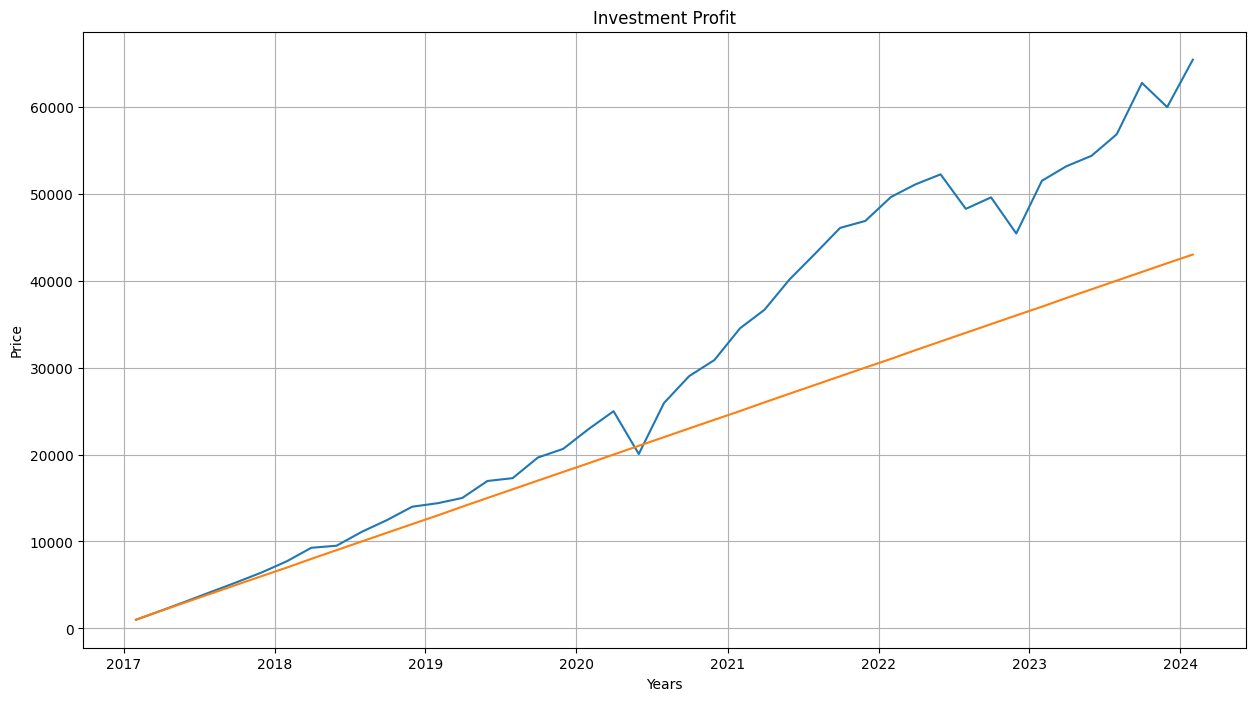

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(df["Date"], df["Portfolio Value"], label="Portfolio Value")
plt.plot(df["Date"], df["Total Investment"], label="Total Investment")
plt.title("Investment Profit")
plt.ylabel("Price")
plt.xlabel("Years")
plt.grid(True)
plt.show()